In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [3, 2]

# Basics of differential equations

## First-order linear differential equations

$$ \tau \frac{dx}{dt} = -x + \alpha $$
$$ \frac{dx}{dt} = f(x) = \frac{-x+\alpha}{\tau} $$

If $x=x_0$ at time $t=0$, then what is $x(t)$ at any time $t>0$?

Easy to check that the solution for $\alpha=0$ is $ x(t) = x_0 \exp(-t/\tau)$.

For $\alpha \neq 0$, we can write $y(t) = x(t)-\alpha$ which obeys $dy/dt = dx/dt = -y$ such that $y(t) = y_0 \exp(-t/\tau)$. Therefore,

$$ x(t) = \alpha + y(t) = \alpha + (x_0 - \alpha) \exp(-t/\tau) $$


In [2]:
def solution(tau, alpha, x0, t):
    return alpha + (x0-alpha)*np.exp(-t/tau)

In [6]:
tau = 10 # in ms, say
alpha = 1.5
x0 = 2.5
t0 = 0
duration = 10
t = np.linspace(t0, duration, 201)

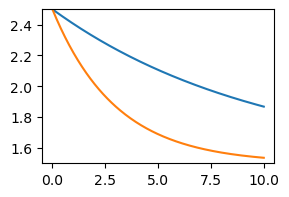

In [9]:
_ = plt.plot(t, solution(tau, alpha, x0, t))
_ = plt.plot(t, solution(3, alpha, x0, t))
_ = plt.ylim(1.5,2.5)

In [10]:
def euler_integrate(f, x0, t0, duration, signal=None, dt=1e-2):
    n_bins = int(duration/dt)
    
    # initialise our solution time array
    x = np.zeros(n_bins)
    # we will also store the time bins themselves, useful e.g. for plotting
    t = np.zeros(n_bins)
    
    if signal is None:
        u = np.zeros(n_bins)
    else:
        u = signal(n_bins)
        
    # set the initial value of x and t
    t[0] = t0
    x[0] = x0
    
    # progressively looping through time and integrating the solution:
    for i in range(n_bins-1):
        x[i+1] = x[i] + dt*(f(x[i]) + u[i])
        t[i+1] = t[i] + dt
    
    return t, x, u

In [19]:
def f(x):
    return (-x + alpha)/tau

t_num, x_num, _ = euler_integrate(f, x0, t0, duration, dt=0.5)

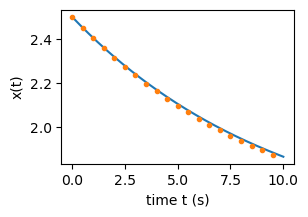

In [20]:
plt.plot(t, solution(tau, alpha, x0, t))
plt.plot(t_num, x_num, '.')
plt.xlabel("time t (s)")
_ = plt.ylabel("x(t)")

Consider now the case where $\alpha$ is varies with time. 

In [ ]:
x0 = 0
tau=1
tau_input = 0.6

def f(x):
    return -x/tau

# define a more complex input signal, which is random but continuous
def random_signal(n_bins):
    t = np.reshape(np.linspace(t0, duration, n_bins), (n_bins, 1))
    z = t - t.T
    c = np.exp(-np.abs(z)/tau_input)
    u, s, _ = np.linalg.svd(c)
    signal = (u * np.sqrt(s)) @ np.random.randn(n_bins, 1) / tau
    return np.reshape(signal, (n_bins,))

In [ ]:
r = random_signal(200)

In [ ]:
_ = plt.plot(t_num, r)

In [ ]:
t_num, x_num, u_num = euler_integrate(f, x0, t0, duration, signal=random_signal, dt=0.05)

In [ ]:
plt.plot(t_num, u_num, '-k')
plt.plot(t_num, x_num, '-')

plt.xlabel("time t (s)")
plt.ylabel("x(t)")

The blue line (output of the dynamics, x(t)) follows the “slow trend” of the input signal (black line), with a bit of a phase lag. People in engineering say that x(t) is a “low-pass filtered version of u(t)”. In other words, the dynamics filter out the high frequency components of the input and only retain the low-frequency (= slow) components.